In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def f(x):
    return 3*x**2 - 4*x + 5

In [7]:
f(3.0)

20.0

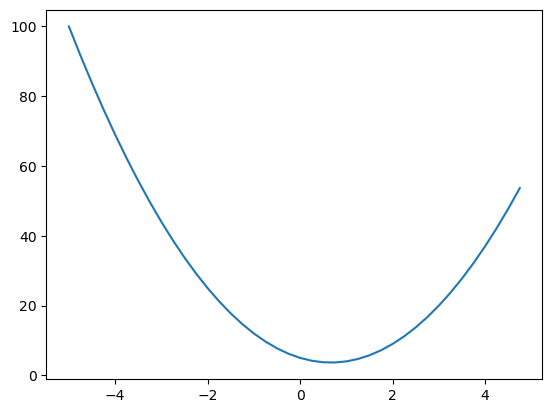

In [8]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs, ys)

In [11]:
h = 0.001
x = 3.0
(f(x+h) - f(x))/h

14.00300000000243

In [12]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [14]:
#display the derivate of d wrt to a,b,c

h = 0.0001

a=2.0
b=-3.0
c=10.0

d1 = a*b+c
a += h
d2 = a*b + c
print("d1", d1)
print("d2", d2)
print("slope", (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


# Build the value object of micrograd

In [53]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label =''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  
  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out
  


a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label="e"
d = a*b+c; d.label = "d"
f = Value(-2.0, label="f")
L = d*f; L.label="L"
L

Value(data=-8.0)

In [54]:
#Visualise

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

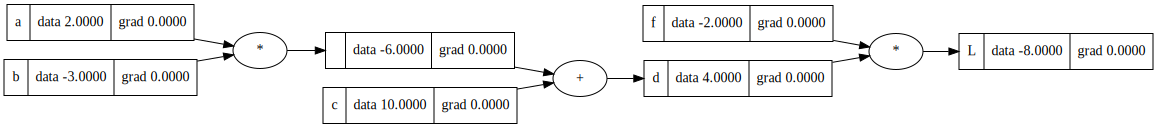

In [55]:
draw_dot(L)

In [ ]:
#TODO: Continue from 32:26